# 1.Business Understanding

### 1. Latar Belakang
Kualitas buah, terutama jeruk, adalah faktor penting yang memengaruhi nilai pasar, kepuasan konsumen, dan tingkat penerimaan produk oleh distributor dan pengecer. Produsen jeruk sering menghadapi tantangan dalam menentukan kualitas buah berdasarkan berbagai atribut seperti ukuran, berat, tingkat kemanisan (brix), pH, kelembutan, dan lainnya.

### 2. Goals
Utama: Membuat model prediktif untuk menilai kualitas jeruk secara otomatis berdasarkan atribut tertentu.
Tambahan:
1. Meningkatkan efisiensi klasifikasi kualitas jeruk di tahap pasca-panen.
2. Memberikan wawasan bagi produsen tentang faktor-faktor utama yang memengaruhi kualitas jeruk.
3. Membantu dalam pengambilan keputusan terkait perbaikan proses pertanian atau distribusi.

### 3. Problem Statement
Masalah Utama: 
* Bagaimana memprediksi kualitas jeruk (skor kualitas) berdasarkan atribut fisik dan kimia (size, weight, brix, pH, warna, dan lainnya)?
  
Masalah Tambahan:
* Menentukan fitur atau karakteristik yang paling signifikan dalam memengaruhi kualitas jeruk.
* Meningkatkan akurasi prediksi menggunakan model pembelajaran mesin.
* Mengatasi bias atau inkonsistensi dalam penilaian manual yang sering dilakukan oleh tenaga kerja manusia.

### 4. Solusi
Pemanfaatan Teknologi:
* Menggunakan machine learning untuk membangun model prediktif berbasis data yang dapat menilai kualitas jeruk secara akurat dan otomatis.

Model yang Diusulkan:
* Model yang akan yang dipilih ada sekitar 10 model untuk dilatih kemudian mencari model yang terbaik untuk dataset ini.
* Harapanaya model ini dapat diintegrasikan ke dalam perangkat lunak atau perangkat keras (seperti perangkat sortasi otomatis) untuk digunakan langsung di lapangan.

Analisis Feature Importance:
* Menentukan atribut mana yang paling penting untuk kualitas jeruk, seperti tingkat kemanisan (brix) dan berat, sehingga membantu produsen memprioritaskan aspek tersebut dalam proses pertanian.

### 5.Nilai Bisnis
1. Mengurangi waktu dan biaya dalam proses penilaian kualitas secara manual.
2. Memberikan laporan kualitas secara objektif, yang dapat meningkatkan kepercayaan konsumen dan distributor.
3. Membantu produsen mengambil langkah-langkah strategis untuk meningkatkan hasil panen dan kualitas produk.

# 2.Data Understanding

Dataset orange-quality berasal dari kaggle yang bisa diakses <a href="https://www.kaggle.com/datasets/shruthiiiee/orange-quality">disini</a> yang berisi dan keterangan kolom lebih lengkap sebagai berikut :

| No  | Kolom                | Tipe Data   | Deskripsi                                                                 |
|-----|----------------------|-------------|---------------------------------------------------------------------------|
| 1   | Size (cm)           | Float       | Diameter atau ukuran jeruk dalam satuan sentimeter.                       |
| 2   | Weight (g)          | Integer     | Berat jeruk dalam satuan gram.                                            |
| 3   | Brix (Sweetness)    | Float       | Tingkat kemanisan jeruk berdasarkan skala Brix.                           |
| 4   | pH (Acidity)        | Float       | Tingkat keasaman jeruk. Nilai pH lebih rendah menunjukkan keasaman tinggi.|
| 5   | Softness (1-5)      | Float       | Tingkat kelembutan jeruk pada skala 1 (keras) hingga 5 (lembut).          |
| 6   | HarvestTime (days)  | Integer     | Waktu panen jeruk sejak pembungaan, dalam satuan hari.                    |
| 7   | Ripeness (1-5)      | Float       | Tingkat kematangan jeruk pada skala 1 (belum matang) hingga 5 (sangat matang). |
| 8   | Color               | Object      | Warna kulit jeruk, seperti "orange", "yellow", atau "green".              |
| 9   | Variety             | Object      | Jenis atau varietas jeruk, misalnya "Navel", "Valencia", atau "Mandarin". |
| 10  | Blemishes (Y/N)     | Object      | Adanya cacat atau noda pada kulit jeruk (Y: Ada, N: Tidak ada).           |
| 11  | Quality (1-5)       | Float       | Penilaian kualitas jeruk pada skala 1 (buruk) hingga 5 (sangat baik).     |


In [607]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score,learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import joblib

warnings.filterwarnings("ignore", category=UserWarning)

In [608]:
#load dataset
df = pd.read_csv("../data/Orange Quality Data.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [609]:
df.info()
print(f"\nDataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB

Dataset memiliki 241 baris dan 11 kolom.


In [610]:
display(df.describe(include="object"),df.describe())

,Color,Variety,Blemishes (Y/N)
count,241,241,241
unique,5,24,12
top,Deep Orange,Cara Cara,N
freq,75,21,149


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [611]:
# create function for deep information
def inspect_dataframe(df):
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

inspect_dataframe(df)

,ColumnName,Nrow,DataType,NAPct,DuplicatePct,UniqueValue,Sample
0,Size (cm),241,float64,0.0,0.0,41,"[7.5, 8.2, 6.8, 9.0, 8.5, 6.7, 7.2, 6.5, 8.8, ..."
1,Weight (g),241,int64,0.0,0.0,131,"[180, 220, 150, 250, 210, 126, 160, 130, 240, ..."
2,Brix (Sweetness),241,float64,0.0,0.0,82,"[12.0, 10.5, 14.0, 8.5, 11.5, 9.1, 9.0, 13.5, ..."
3,pH (Acidity),241,float64,0.0,0.0,44,"[3.2, 3.4, 3.0, 3.8, 3.3, 3.5, 2.8, 4.0, 3.1, ..."
4,Softness (1-5),241,float64,0.0,0.0,9,"[2.0, 3.0, 1.0, 4.0, 2.5, 3.5, 1.5, 5.0, 4.5]"
5,HarvestTime (days),241,int64,0.0,0.0,22,"[10, 14, 7, 21, 12, 25, 9, 5, 18, 11, 24, 13, ..."
6,Ripeness (1-5),241,float64,0.0,0.0,8,"[4.0, 4.5, 5.0, 3.5, 2.0, 3.0, 2.5, 1.0]"
7,Color,241,object,0.0,0.0,5,"[Orange, Deep Orange, Light Orange, Orange-Red..."
8,Variety,241,object,0.0,0.0,24,"[Valencia, Navel, Cara Cara, Blood Orange, Ham..."
9,Blemishes (Y/N),241,object,0.0,0.0,12,"[N, Y (Minor), Y (Sunburn), Y (Mold Spot), Y (..."


interpretasi : 
* Dataset memiliki 241 baris dan 11 kolom dengan 3 kolom tipe object dan 8 tipe integer atau float.
* Dataset tidak memiliki missing value.
* Dataset tidak memiliki duplicated data.
* Jenis dari buah jeruk ini bervariatif ada sekitar 24 jenis.
* Untuk Blemishes terdapat 12 macam cacat sepert iyang digambarkan diatas.
* Pada dataset buah jeruk ini most frequens untuk warna yaitu Deep Orango sebanyak 71, jenis jeruknya terbanyak tipe Cara Cara dan cacat pada buah didominasi oleh N atau tidak cacat pada buah sebanyak 149.

## 1.EDA

### 1.Univariate Analyst

#### 1.Kolom Target(Quality)

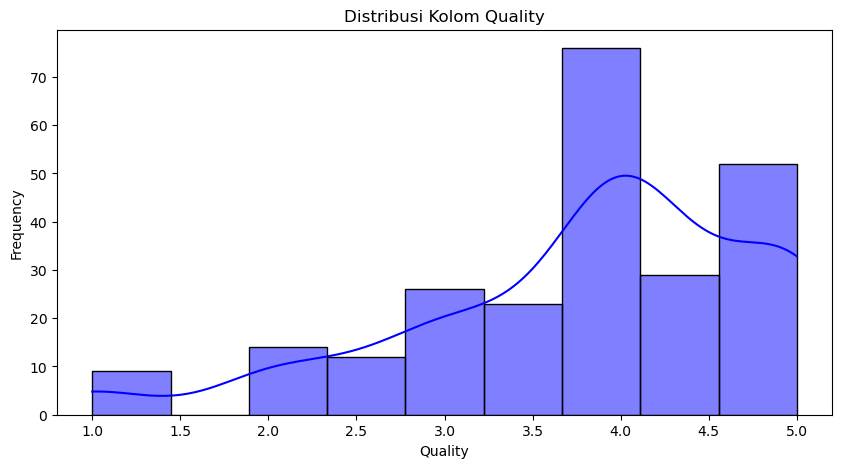

In [612]:
#plot distribusion for column quality
plt.figure(figsize=(10, 5))
sns.histplot(df["Quality (1-5)"], kde=True, color='blue')
plt.title(f"Distribusi Kolom Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

Data yang kita punya memiliki kualitas buah jeruk yang cenderung bagus diantara 4-5.

#### 2.Kolom numerical

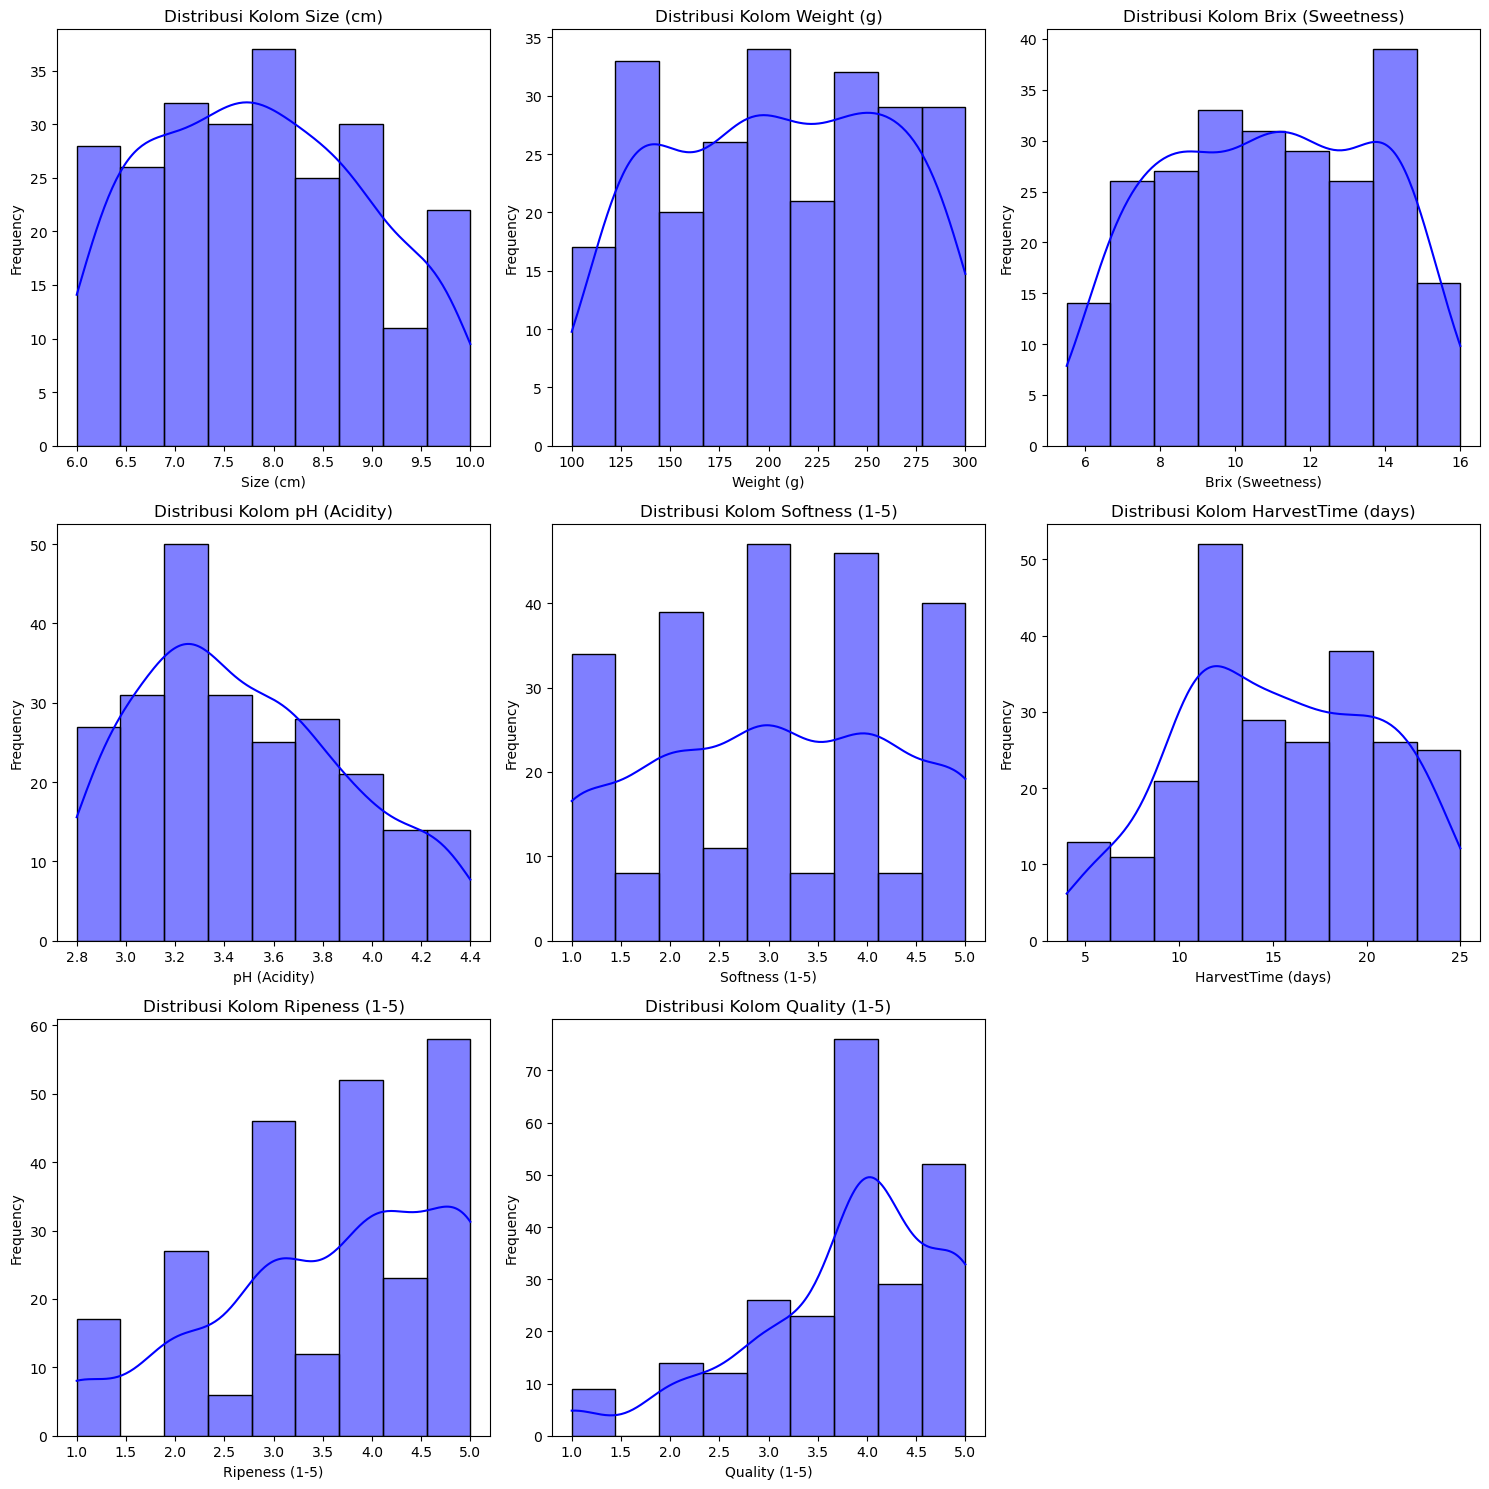

In [613]:
# Mengambil kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

# Menentukan jumlah kolom dan baris untuk subplots
num_cols = 3  # Jumlah kolom dalam grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang diperlukan

# Membuat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Meratakan array axes untuk memudahkan indexing

# Loop untuk membuat histogram untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribusi Kolom {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Menghapus axes yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

#### 3.Kolom Categorical

#### 1.Color

C:\Users\Tofik\AppData\Local\Temp\ipykernel_924\2704294405.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Color", palette="magma", order=ordered_colors)  # Menggunakan order


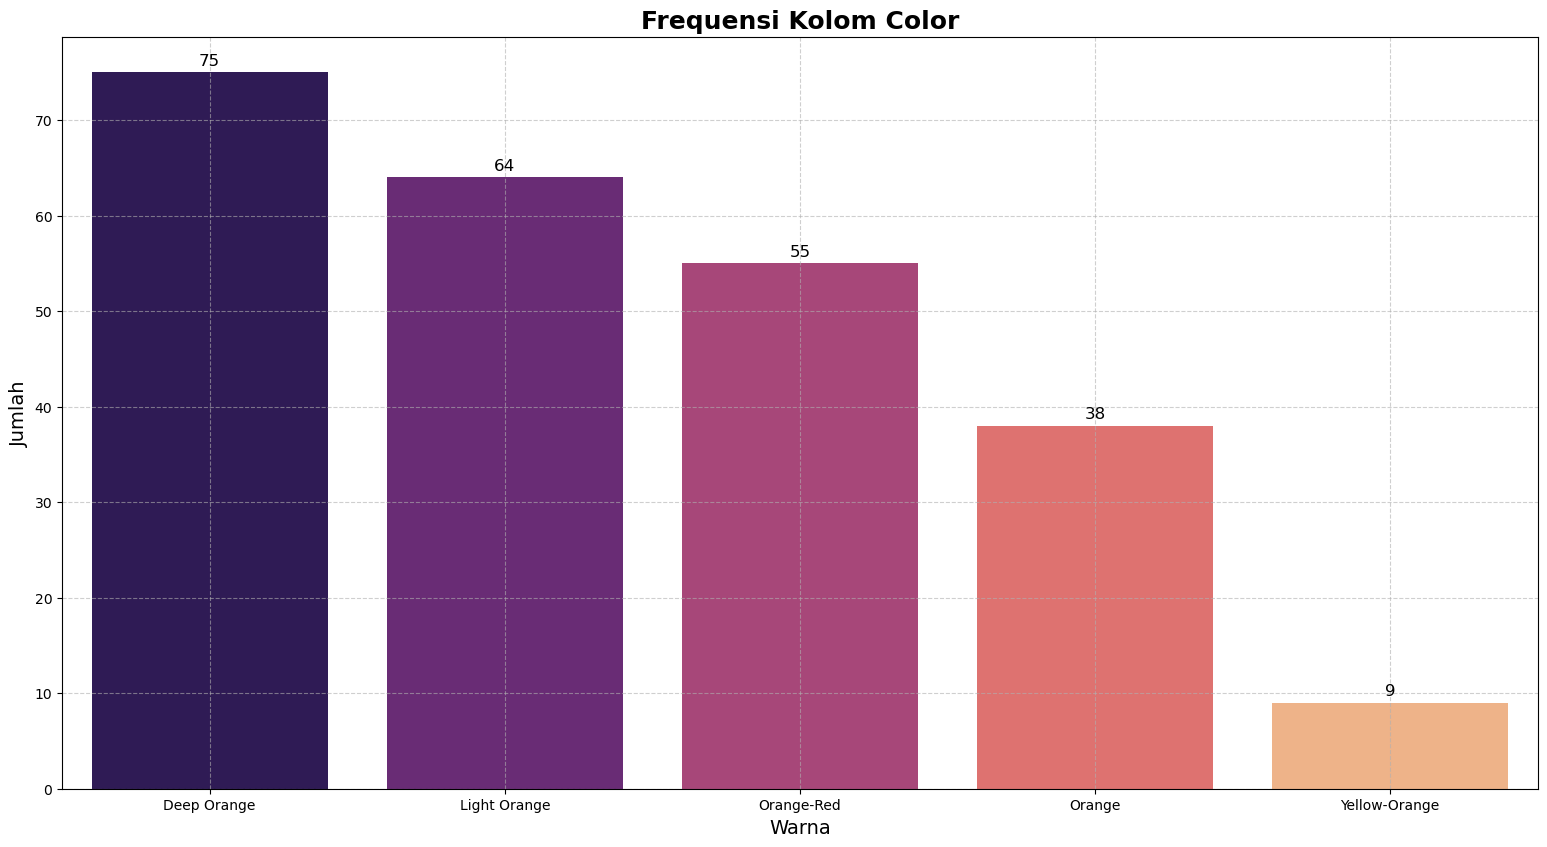

In [614]:
# Menghitung jumlah setiap kategori dalam kolom "Color"
color_counts = df['Color'].value_counts()

# Mengurutkan kategori berdasarkan jumlah
ordered_colors = color_counts.index

# Visualisasi data
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x="Color", palette="magma", order=ordered_colors)  # Menggunakan order

# Tambahkan angka di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Tambahkan judul dan label
plt.title("Frequensi Kolom Color", fontsize=18, weight='bold')
plt.xlabel("Warna", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)

# Tata letak agar tidak berantakan
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(pad=-1)
plt.show()

hasil dari visualisasi diatas dilihat bahwa warna dari jeruk pada dataset dominan oleh warna deep orange sebanyak 75.

#### 2.Variety

C:\Users\Tofik\AppData\Local\Temp\ipykernel_924\1926233645.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y="Variety", palette="magma", order=ordered_varieties)  # Menggunakan order


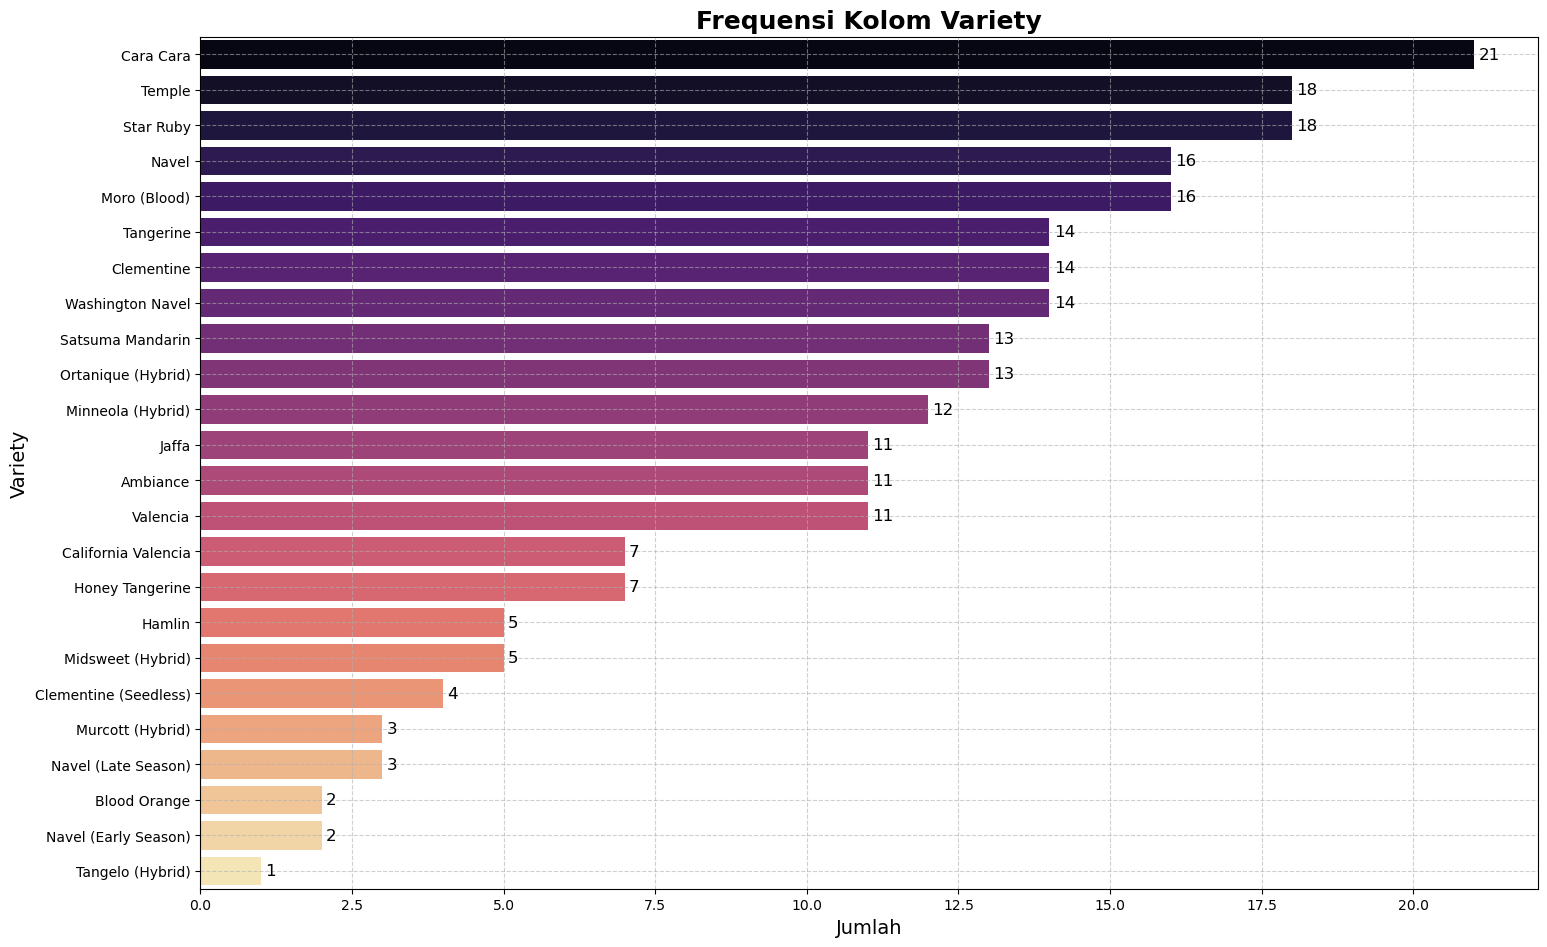

In [615]:
# Menghitung jumlah setiap kategori dalam kolom "Variety"
variety_counts = df['Variety'].value_counts()

# Mengurutkan kategori berdasarkan jumlah
ordered_varieties = variety_counts.index

# Visualisasi data
plt.figure(figsize=(15, 9))
ax = sns.countplot(data=df, y="Variety", palette="magma", order=ordered_varieties)  # Menggunakan order

# Tambahkan angka di samping setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Tambahkan judul dan label
plt.title("Frequensi Kolom Variety", fontsize=18, weight='bold')
plt.xlabel("Jumlah", fontsize=14) 
plt.ylabel("Variety", fontsize=14)

# Tata letak agar tidak berantakan
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(pad=-1)
plt.show()

Barhchart ini menunjukan bahwa buah orange dengan jenis Cara-cara memiliki frequansi yang paling tinggi sebanyak 21 disusul dengan temple, start ruby dan masih banyak yang lainya. 

#### 3.Blemishes (Y/N)

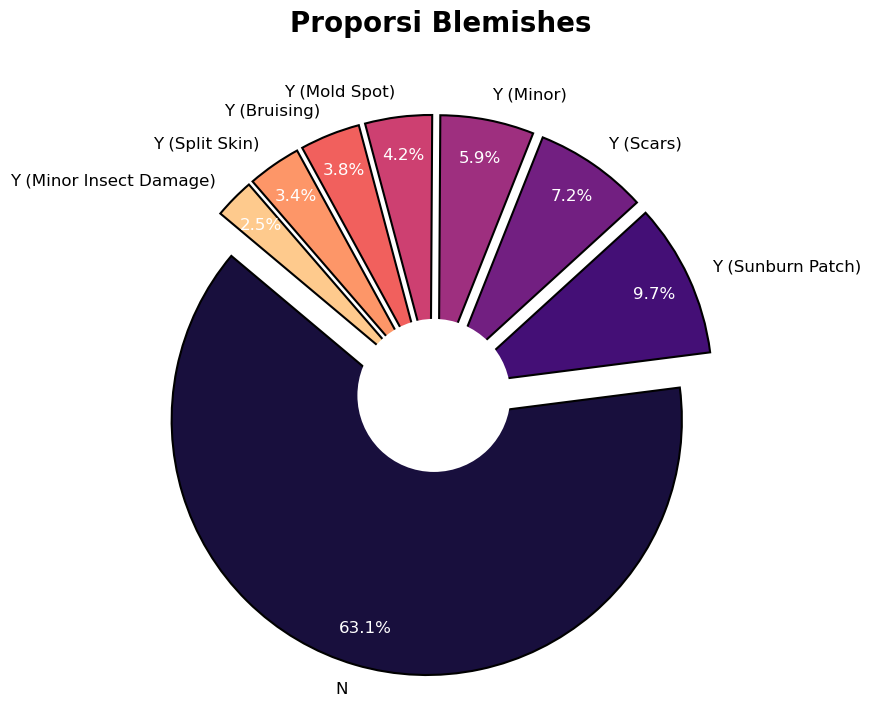

In [616]:
# Menghitung jumlah setiap kategori dalam kolom "Blemishes (Y/N)"
blemish_counts = df['Blemishes (Y/N)'].value_counts()

# Mengambil 7 kategori teratas
top_blemishes = blemish_counts.nlargest(8)

# Membuat donut chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette("magma", len(top_blemishes))  # Menggunakan palet warna magma

# Membuat pie chart dengan radius yang lebih kecil untuk efek donut
wedges, texts, autotexts = plt.pie(top_blemishes, 
                                    labels=top_blemishes.index, 
                                    autopct='%1.1f%%', 
                                    startangle=140, 
                                    colors=colors, 
                                    pctdistance=0.85,
                                    textprops={'color': 'black', 'fontsize': 12},  # Mengubah warna font label menjadi hitam
                                    explode=[0.1]*len(top_blemishes))  # Memberikan efek meledak pada setiap irisan

# Mengubah warna font untuk persentase menjadi putih
for autotext in autotexts:
    autotext.set_color('white')  # Mengubah warna font persentase menjadi putih

# Membuat lingkaran di tengah untuk efek donut
centre_circle = plt.Circle((0, 0), 0.30, fc='white')  # Mengatur radius lingkaran tengah
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan bayangan pada irisan dan garis tepi
for wedge in wedges:
    wedge.set_edgecolor('black')  # Menambahkan garis pemisah hitam pada irisan
    wedge.set_linewidth(1.5)  # Mengatur ketebalan garis pemisah

# Menambahkan judul dengan jarak dari atas
plt.title("Proporsi Blemishes", fontsize=20, weight='bold', color='black', pad=40)  # Menambahkan jarak 20 dari atas

# Menampilkan donut chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_facecolor('lightgrey')  # Mengatur latar belakang menjadi abu-abu terang
plt.show()

Pie chart ini menunjukkan proporsi blemishes dalam dataset. Kategori yang dominan adalah N dengan 63.1%, menunjukkan bahwa sebagian besar sampel tidak memiliki blemishes. Kategori lainnya mewakili berbagai jenis blemishes:

### 4.Bivariate Analyst

#### 1.Color Vs Quality

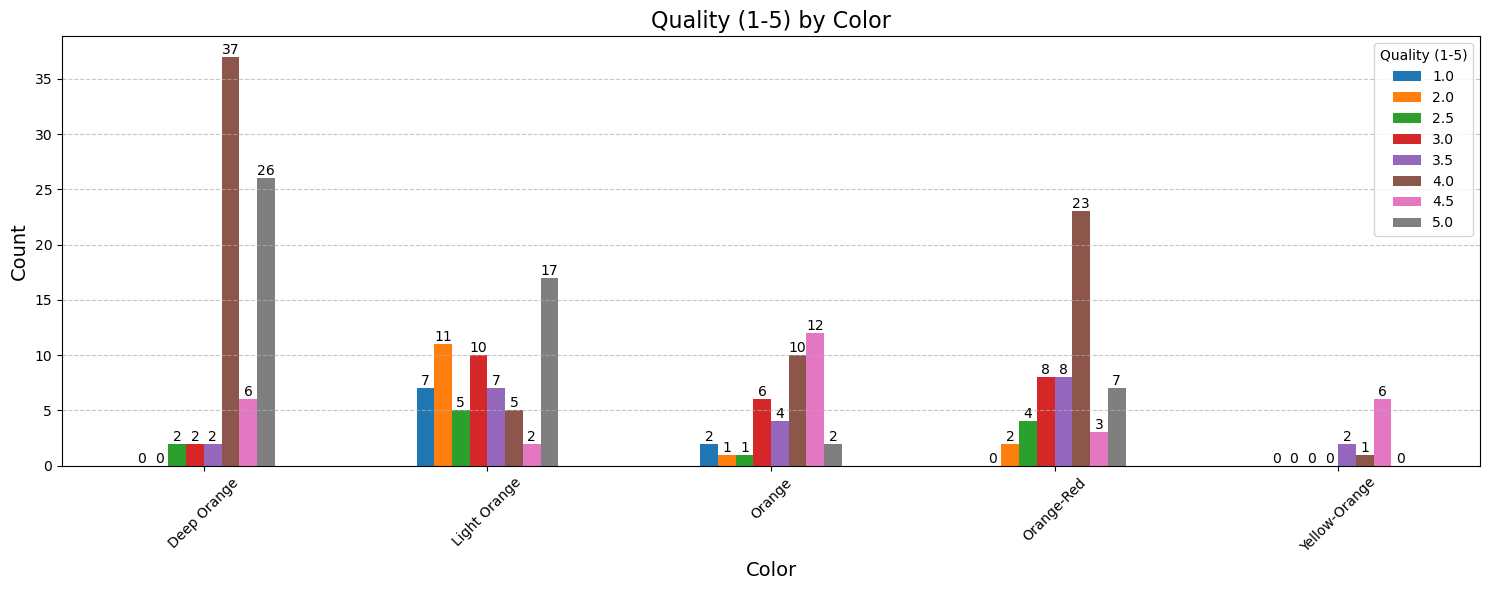

In [617]:
# Misalkan df adalah DataFrame yang sudah ada
quality_size = pd.crosstab(df['Color'], df['Quality (1-5)'])

# Mengatur palet warna menggunakan seaborn
colors = sns.color_palette(n_colors=quality_size.shape[1])

# Membuat grafik batang
ax = quality_size.plot(kind='bar', figsize=(15, 6), color=colors)

# Mengatur label sumbu x
ax.set_xticklabels(quality_size.index, rotation=45)

# Menambahkan label dan judul
plt.xlabel('Color', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Quality (1-5) by Color', fontsize=16)

# Menambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### 2.Variety Vs Quality

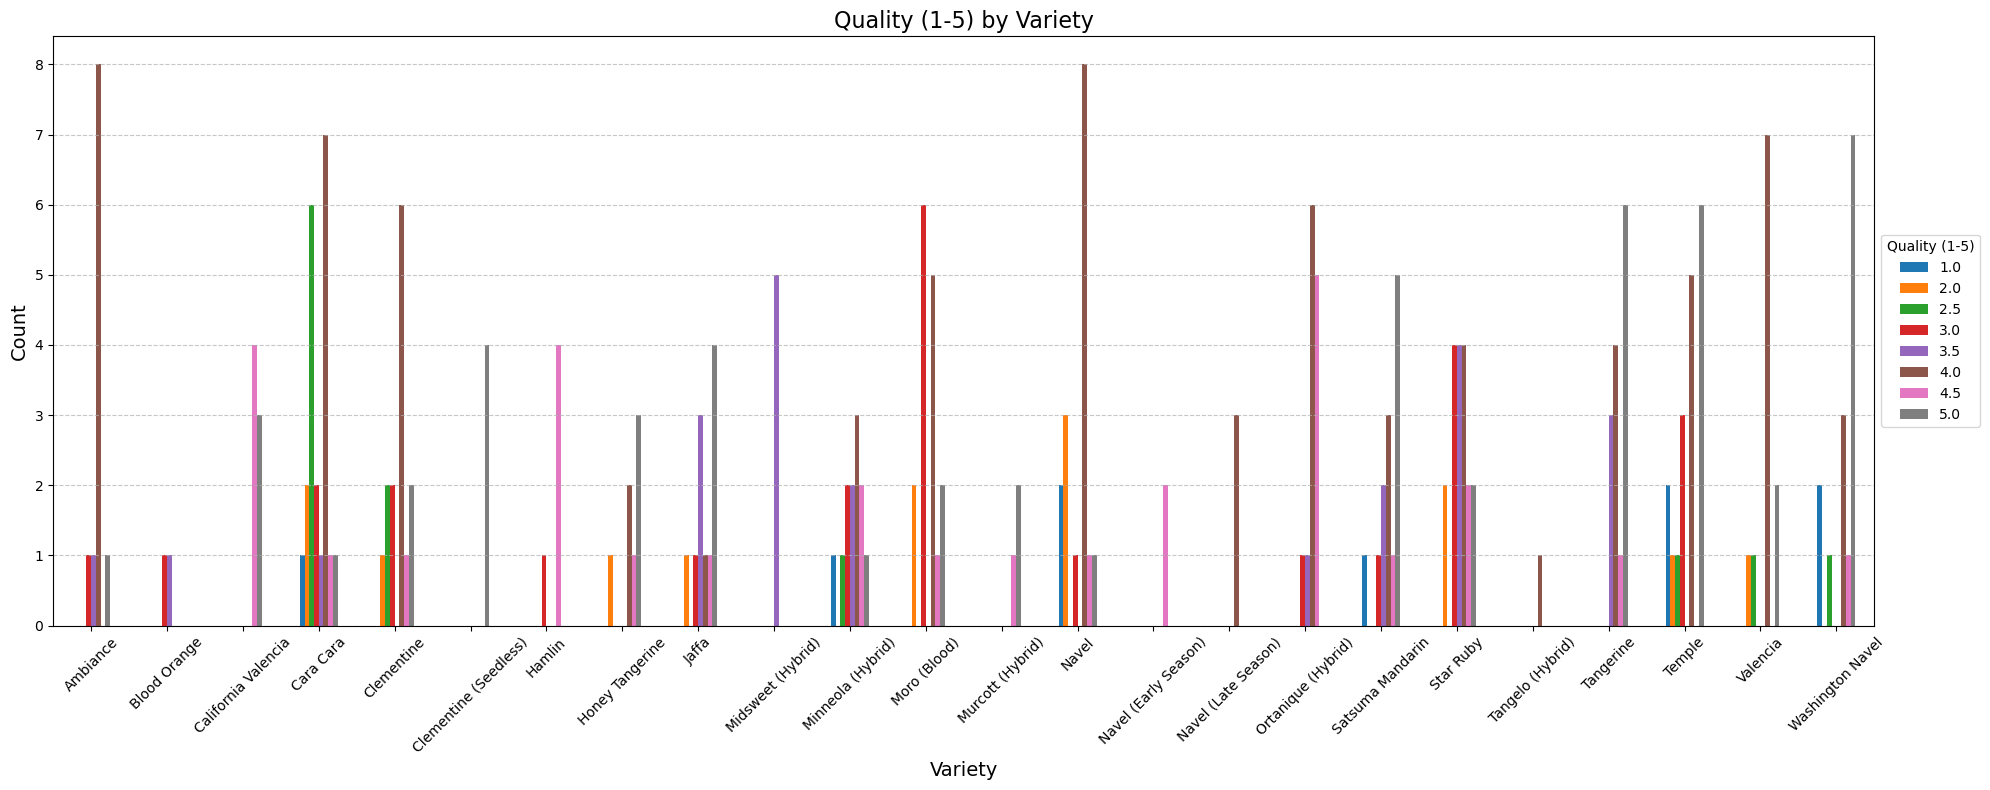

In [618]:
# Misalkan df adalah DataFrame yang sudah ada
quality_size = pd.crosstab(df['Variety'], df['Quality (1-5)'])

# Mengatur palet warna menggunakan seaborn
colors = sns.color_palette(n_colors=quality_size.shape[1])

# Membuat grafik batang
ax = quality_size.plot(kind='bar', figsize=(20, 8), color=colors)

# Mengatur label sumbu x
ax.set_xticklabels(quality_size.index, rotation=45)

# Menambahkan label dan judul
plt.xlabel('Variety', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Quality (1-5) by Variety', fontsize=16)

# Menambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur legenda
plt.legend(title='Quality (1-5)', loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### 3.Softness  Vs Quality

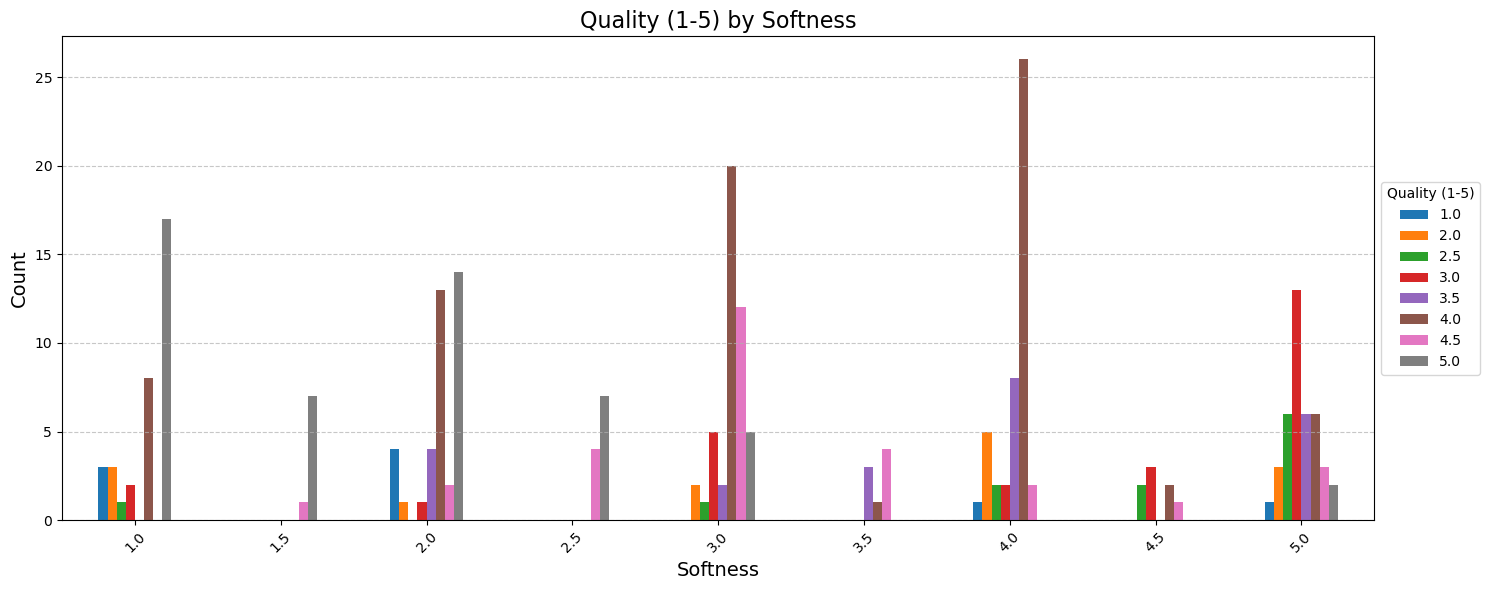

In [619]:
# Misalkan orange adalah DataFrame yang sudah ada
quality_size = pd.crosstab(df['Softness (1-5)'], df['Quality (1-5)'])

# Mengatur palet warna menggunakan seaborn
colors = sns.color_palette(n_colors=quality_size.shape[1])

# Membuat grafik batang
ax = quality_size.plot(kind='bar', figsize=(15, 6), color=colors)

# Mengatur label sumbu x
ax.set_xticklabels(quality_size.index, rotation=45)

# Menambahkan label dan judul
plt.xlabel('Softness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Quality (1-5) by Softness', fontsize=16)

# Menambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur legenda
plt.legend(title='Quality (1-5)', loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### 4.Softness  Vs Quality

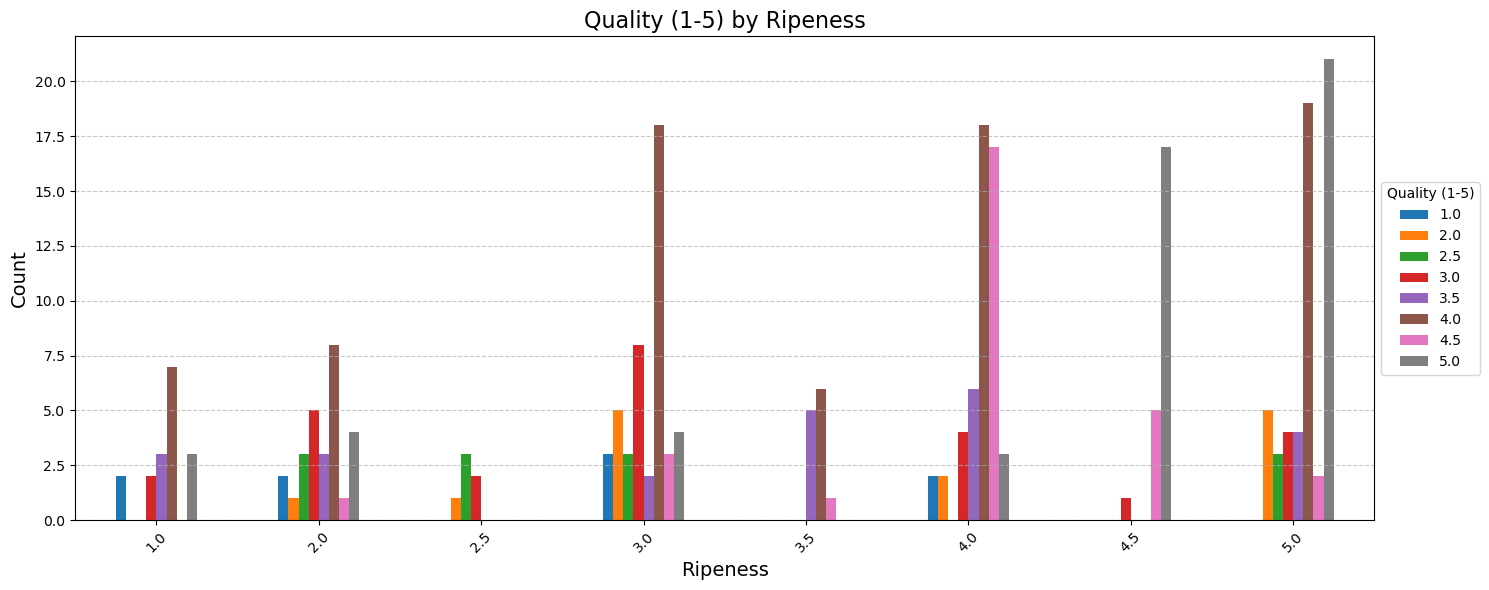

In [620]:
# Misalkan orange adalah DataFrame yang sudah ada
quality_size = pd.crosstab(df['Ripeness (1-5)'], df['Quality (1-5)'])

# Mengatur palet warna menggunakan seaborn
colors = sns.color_palette(n_colors=quality_size.shape[1])

# Membuat grafik batang
ax = quality_size.plot(kind='bar', figsize=(15, 6), color=colors)

# Mengatur label sumbu x
ax.set_xticklabels(quality_size.index, rotation=45)

# Menambahkan label dan judul
plt.xlabel('Ripeness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Quality (1-5) by Ripeness', fontsize=16)

# Menambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur legenda
plt.legend(title='Quality (1-5)', loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### 5.Blemishes  Vs Quality

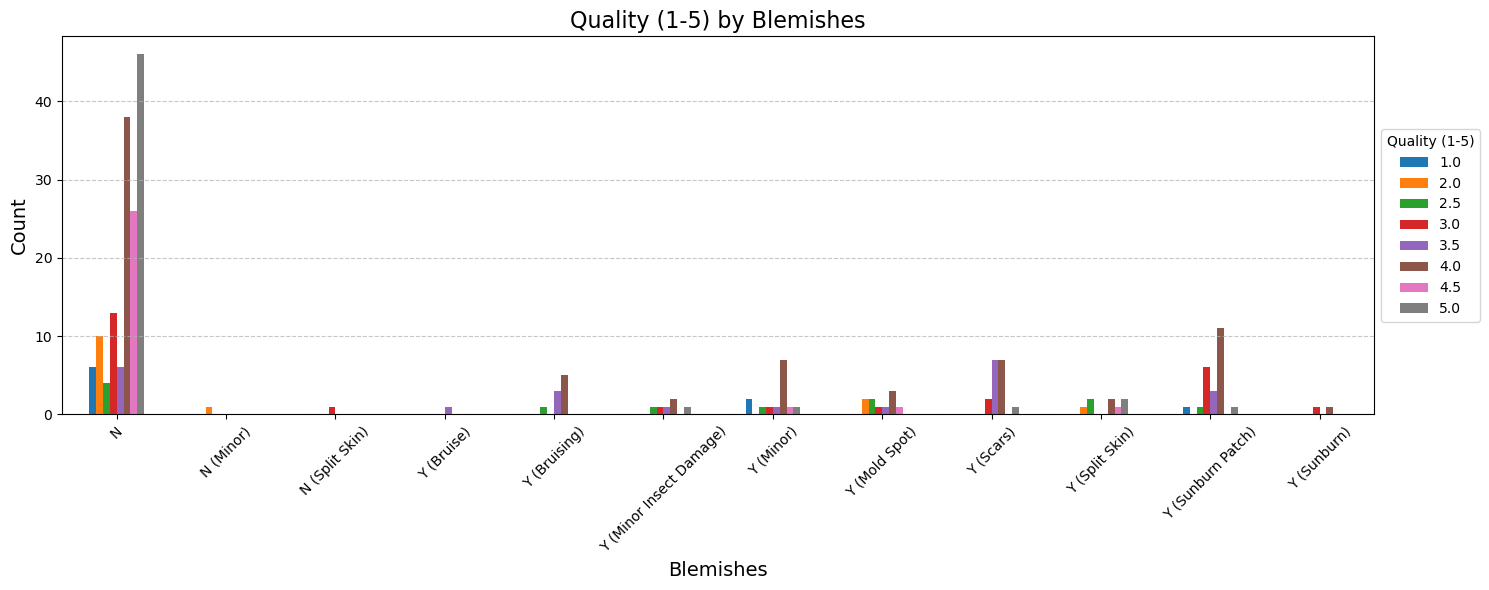

In [621]:
# Misalkan orange adalah DataFrame yang sudah ada
quality_size = pd.crosstab(df['Blemishes (Y/N)'], df['Quality (1-5)'])

# Mengatur palet warna menggunakan seaborn
colors = sns.color_palette(n_colors=quality_size.shape[1])

# Membuat grafik batang
ax = quality_size.plot(kind='bar', figsize=(15, 6), color=colors)

# Mengatur label sumbu x
ax.set_xticklabels(quality_size.index, rotation=45)

# Menambahkan label dan judul
plt.xlabel('Blemishes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Quality (1-5) by Blemishes', fontsize=16)

# Menambahkan grid untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur legenda
plt.legend(title='Quality (1-5)', loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan grafik
plt.tight_layout()
plt.show()

### 4.Multivariate

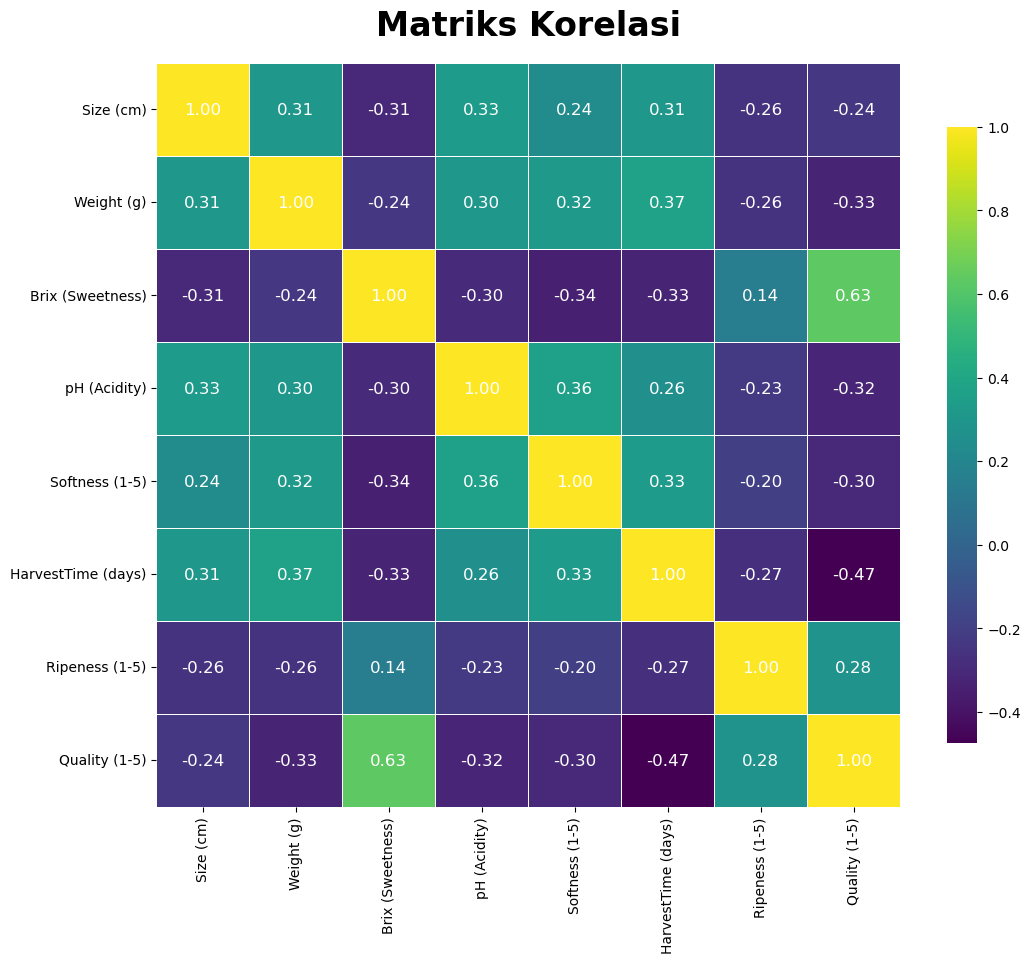

In [622]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='viridis',  
            square=True, 
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,
            linecolor='white', 
            annot_kws={"size": 12, "color": "white"}) 

# Menambahkan judul
plt.title("Matriks Korelasi", fontsize=24, weight='bold', color='black', pad=20)  

# Menampilkan heatmap
plt.show()

Interpretasi matriks korelasi yang diberikan, berikut adalah interpretasi hubungan antar variabel:

Size (cm):

* Memiliki korelasi positif yang lemah dengan Weight (g).
* Memiliki korelasi negatif yang lemah dengan Brix (Sweetness), pH (Acidity), dan Softness (1-5).
* Memiliki korelasi positif yang lemah dengan HarvestTime (days).
* Memiliki korelasi negatif yang lemah dengan Ripeness (1-5) dan Quality (1-5).

Weight (g):

* Memiliki korelasi positif yang lemah dengan Softness (1-5) dan HarvestTime (days).
* Memiliki korelasi negatif yang lemah dengan Brix (Sweetness), pH (Acidity), Ripeness (1-5), dan Quality (1-5).

Brix (Sweetness):

* Memiliki korelasi positif yang kuat dengan Quality (1-5).
* Memiliki korelasi negatif yang lemah dengan Size (cm), Weight (g), pH (Acidity), Softness (1-5), dan HarvestTime (days).
* Memiliki korelasi positif yang lemah dengan Ripeness (1-5).
  
pH (Acidity):

* Memiliki korelasi positif yang lemah dengan Softness (1-5) dan HarvestTime (days).
* Memiliki korelasi negatif yang lemah dengan Size (cm), Weight (g), Brix (Sweetness), dan Ripeness (1-5).
* Memiliki korelasi negatif yang kuat dengan Quality (1-5).

Softness (1-5):

* Memiliki korelasi positif yang lemah dengan Weight ( g) dan pH (Acidity).
* Memiliki korelasi negatif yang lemah dengan Size (cm), Brix (Sweetness), Ripeness (1-5), dan Quality (1-5).
* Memiliki korelasi positif yang lemah dengan HarvestTime (days).
  
HarvestTime (days):

* Memiliki korelasi positif yang lemah dengan Size (cm), Weight (g), Brix (Sweetness), dan Softness (1-5).
* Memiliki korelasi negatif yang lemah dengan Ripeness (1-5) dan Quality (1-5).
  
Ripeness (1-5):

* Memiliki korelasi negatif yang lemah dengan Size (cm), Weight (g), Brix (Sweetness), pH (Acidity), dan Softness (1-5).
* Memiliki korelasi positif yang lemah dengan Quality (1-5).
  
Quality (1-5):

* Memiliki korelasi positif yang kuat dengan Brix (Sweetness).
* Memiliki korelasi negatif yang kuat dengan pH (Acidity).
* Memiliki korelasi negatif yang lemah dengan Size (cm), Weight (g), Softness (1-5), dan Ripeness (1-5).
  
Kesimpulan Matriks korelasi ini menunjukkan bahwa Brix (Sweetness) dan Quality (1-5) memiliki hubungan yang paling kuat, sedangkan variabel lainnya menunjukkan hubungan yang lebih lemah. Hubungan negatif yang kuat antara pH (Acidity) dan Quality (1-5) juga menunjukkan bahwa peningkatan keasaman dapat berhubungan dengan penurunan kualitas.

# 3.Data Preparation

### 1.Cek Missing Value

In [623]:
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

### 2.Cek Duplicated Data

In [624]:
df[df.duplicated()]

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)


In [625]:
df[df.duplicated()].count()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

### 3.Cek Outlier 

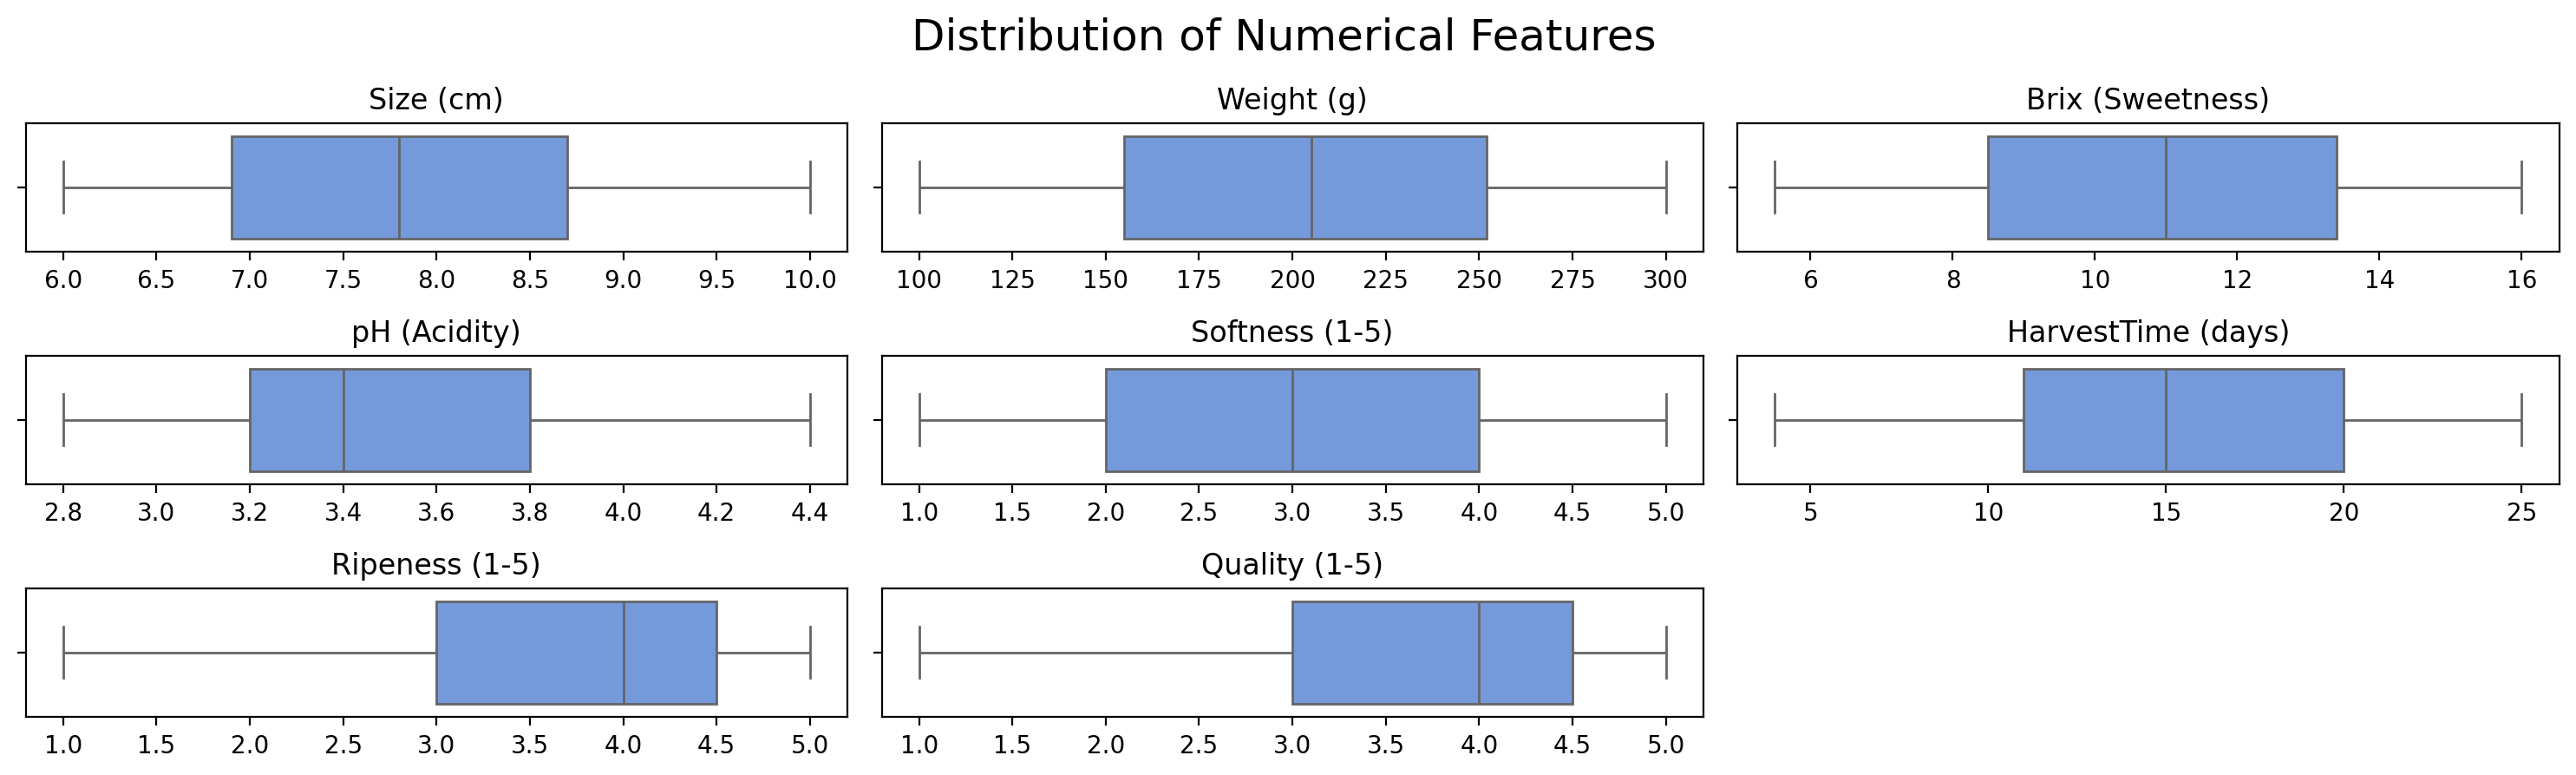

In [626]:
# define kolom yang bertujuan melihat distribusi dari masing-masing kolom numeric
numerical_columns = df.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7), dpi=200)
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[col], color='cornflowerblue', orient='v')
    plt.title(f'{col}')
    plt.xlabel(None)

plt.tight_layout()
plt.show()

In [627]:
# Identifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop untuk mengecek outlier di setiap kolom numerik
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # Kuartil pertama
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar-kuartil
    
    lower = Q1 - 1.5 * IQR  # Batas bawah
    upper = Q3 + 1.5 * IQR  # Batas atas
    
    # Identifikasi nilai outlier
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Kolom: {column}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column]])  # Menampilkan data outlier untuk kolom tersebut
    print("-" * 50)

Kolom: Size (cm)
Jumlah outlier: 0
Empty DataFrame
Columns: [Size (cm)]
Index: []
--------------------------------------------------
Kolom: Weight (g)
Jumlah outlier: 0
Empty DataFrame
Columns: [Weight (g)]
Index: []
--------------------------------------------------
Kolom: Brix (Sweetness)
Jumlah outlier: 0
Empty DataFrame
Columns: [Brix (Sweetness)]
Index: []
--------------------------------------------------
Kolom: pH (Acidity)
Jumlah outlier: 0
Empty DataFrame
Columns: [pH (Acidity)]
Index: []
--------------------------------------------------
Kolom: Softness (1-5)
Jumlah outlier: 0
Empty DataFrame
Columns: [Softness (1-5)]
Index: []
--------------------------------------------------
Kolom: HarvestTime (days)
Jumlah outlier: 0
Empty DataFrame
Columns: [HarvestTime (days)]
Index: []
--------------------------------------------------
Kolom: Ripeness (1-5)
Jumlah outlier: 0
Empty DataFrame
Columns: [Ripeness (1-5)]
Index: []
--------------------------------------------------
Kolom: Qu

### 4. Mengganti Kolom

In [628]:
#cek kolom
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

In [629]:
#merename kolom untuk lebih spesifik
df = df.rename(columns={
    'Size (cm)' : 'Size',
    'Weight (g)' : 'Weight',
    'Brix (Sweetness)' : 'Brix',
    'pH (Acidity)' : 'Ph',
    'Softness (1-5)' : 'Softness',
    'HarvestTime (days)' : 'HarvestTime',
    'Ripeness (1-5)' : 'Ripeness',
    'Color' : 'Color',
    'Variety' : 'Variety',
    'Blemishes (Y/N)' : 'Blemishes',
    'Quality (1-5)' : 'Quality',
})

df

,Size,Weight,Brix,Ph,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### 5. Mengambil variaty data importent

In [630]:
top_varieties = df['Variety'].value_counts().nlargest(14).index
df['Variety'] = df['Variety'].apply(lambda x: x if x in top_varieties else 'Other')

In [631]:
df.Variety.unique()

array(['Valencia', 'Navel', 'Cara Cara', 'Other', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'Temple', 'Minneola (Hybrid)', 'Satsuma Mandarin',
       'Ortanique (Hybrid)'], dtype=object)

### 6. Mengskalakan nilai softness

In [632]:
df['Softness'] = df['Softness'].apply(lambda x: round(x))

In [633]:
df

,Size,Weight,Brix,Ph,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4,21,3.5,Orange-Red,Other,N,3.5
4,8.5,210,11.5,3.3,2,12,5.0,Orange,Other,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### 7. Mengskalakan nilai Ripeness

In [634]:
df['Ripeness'] = df['Ripeness'].apply(lambda x: round(x))

In [635]:
df

,Size,Weight,Brix,Ph,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2,10,4,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3,14,4,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1,7,5,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4,21,4,Orange-Red,Other,N,3.5
4,8.5,210,11.5,3.3,2,12,5,Orange,Other,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5,13,1,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5,20,5,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3,13,3,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3,23,1,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### 8. Mengganti data pada kolom Blemishes

In [636]:
df['Blemishes'] = df['Blemishes'].apply(lambda x : x if x == 'N' else 'Y')

In [663]:
df

,Size,Weight,Brix,Ph,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2,10,4,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3,14,4,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1,7,5,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4,21,4,Orange-Red,Other,N,3.5
4,8.5,210,11.5,3.3,2,12,5,Orange,Other,Y,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5,13,1,Orange-Red,Tangerine,Y,5.0
237,7.4,275,8.5,3.5,5,20,5,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3,13,3,Deep Orange,Temple,Y,5.0
239,7.2,251,9.8,4.3,3,23,1,Light Orange,Moro (Blood),Y,3.0


### 9.Spliting Data

In [639]:
df_new = df.copy()
df_new

,Size,Weight,Brix,Ph,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2,10,4,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3,14,4,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1,7,5,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4,21,4,Orange-Red,Other,N,3.5
4,8.5,210,11.5,3.3,2,12,5,Orange,Other,Y,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5,13,1,Orange-Red,Tangerine,Y,5.0
237,7.4,275,8.5,3.5,5,20,5,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3,13,3,Deep Orange,Temple,Y,5.0
239,7.2,251,9.8,4.3,3,23,1,Light Orange,Moro (Blood),Y,3.0


In [640]:
X = df_new.drop(['Quality'], axis=1)
y = df_new['Quality']

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((192, 10), (49, 10), (192,), (49,))

### 7.Membuat Pipeline

In [642]:
numerical_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
display(numerical_cols, categorical_cols)

Index(['Size', 'Weight', 'Brix', 'Ph', 'Softness', 'HarvestTime', 'Ripeness'], dtype='object')

Index(['Color', 'Variety', 'Blemishes'], dtype='object')

In [643]:
cat_pipeline = ColumnTransformer([
    ("one_hot", Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]), ["Blemishes", "Color", "Variety"])
])


num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

In [644]:
#Preprocesing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, categorical_cols)
    ]
)

# 4.Modeling

### 3.1 Experimen 1 Basic Model

In [645]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

In [646]:
results = []

# Evaluasi model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Hitung metrik evaluasi
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
     # Simpan hasil ke list
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "Median AE": median_ae,
        "R2 Score": r2
    })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='RMSE', ascending=True).reset_index().drop(columns='index'))

,Model,RMSE,MAE,Median AE,R2 Score
0,SVR,0.515469,0.386394,0.293684,0.643295
1,Ridge Regression,0.551470,0.421849,0.344476,0.591730
2,Linear Regression,0.560869,0.429816,0.312121,0.577696
3,Random Forest,0.562279,0.406837,0.275000,0.575569
4,Gradient Boosting,0.617655,0.437976,0.273619,0.487853
5,K-Nearest Neighbors,0.623682,0.428571,0.300000,0.477808
6,AdaBoost,0.652454,0.517663,0.412281,0.428518
7,XGBoost,0.664530,0.472129,0.351570,0.407167
8,Decision Tree,0.762648,0.448980,0.000000,0.219178
9,Lasso Regression,0.892981,0.741922,0.729167,-0.070503


### 3.2 Experimen 2 Hyperparameter Tuning

In [647]:
# Parameter untuk Hyperparameter Tuning
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {"model__alpha": [0.1, 1, 10, 100]},
    "Lasso Regression": {"model__alpha": [0.1, 1, 10, 100]},
    "Decision Tree": {"model__max_depth": [3, 5, 10, None], "model__min_samples_split": [2, 5, 10]},
    "SVR": {'model__C': [1, 10, 100],'model__epsilon': [0.01, 0.1, 1],'model__kernel': ['linear', 'rbf']},
    "Random Forest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]},
    "Gradient Boosting": {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.01, 0.1, 0.2]},
    "K-Nearest Neighbors": {"model__n_neighbors": [3, 5, 10], "model__weights": ["uniform", "distance"]},
    "XGBoost": {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.01, 0.1, 0.2]},
    "AdaBoost": {"model__n_estimators": [50, 100, 200], "model__learning_rate": [0.01, 0.1, 0.2]}
}

In [648]:
tuning_results = []

# Evaluasi dengan hyperparameter tuning
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(
        pipeline, 
        param_grid=param_grids.get(name, {}), 
        cv=5,
        scoring="r2",
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
     # Hitung metrik evaluasi
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
     # Simpan hasil ke list
    tuning_results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "RMSE": rmse,
        "MAE": mae,
        "Median AE": median_ae,
        "R2 Score": r2
    })

# Tampilkan hasil dalam DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
display(tuning_results_df.sort_values(by='RMSE', ascending=True).reset_index().drop(columns='index'))

,Model,Best Params,RMSE,MAE,Median AE,R2 Score
0,SVR,"{'model__C': 1, 'model__epsilon': 0.01, 'model...",0.516322,0.389681,0.294762,0.642114
1,Ridge Regression,{'model__alpha': 10},0.525831,0.419858,0.336112,0.628810
2,Linear Regression,{},0.560869,0.429816,0.312121,0.577696
3,Random Forest,"{'model__max_depth': 10, 'model__n_estimators'...",0.572208,0.411444,0.308796,0.560447
4,XGBoost,"{'model__learning_rate': 0.01, 'model__n_estim...",0.589736,0.423434,0.254308,0.533106
5,Lasso Regression,{'model__alpha': 0.1},0.593880,0.479045,0.391459,0.526522
6,Gradient Boosting,"{'model__learning_rate': 0.1, 'model__n_estima...",0.603009,0.421362,0.238406,0.511853
7,K-Nearest Neighbors,"{'model__n_neighbors': 5, 'model__weights': 'd...",0.610570,0.423414,0.349394,0.499535
8,AdaBoost,"{'model__learning_rate': 0.2, 'model__n_estima...",0.679470,0.538553,0.482759,0.380211
9,Decision Tree,"{'model__max_depth': 3, 'model__min_samples_sp...",0.756188,0.543752,0.277778,0.232352


In [649]:
print('\nSebelum di lakukan hayper parameter tuning : ')
display(results_df.sort_values(by='RMSE', ascending=True).reset_index().drop(columns='index').head(3))

print('\nSesudah di lakukan hayper parameter tuning : ')
display(tuning_results_df.sort_values(by='RMSE', ascending=True).reset_index().drop(columns='index').head(3))


Sebelum di lakukan hayper parameter tuning : 


,Model,RMSE,MAE,Median AE,R2 Score
0,SVR,0.515469,0.386394,0.293684,0.643295
1,Ridge Regression,0.551470,0.421849,0.344476,0.591730
2,Linear Regression,0.560869,0.429816,0.312121,0.577696



Sesudah di lakukan hayper parameter tuning : 


,Model,Best Params,RMSE,MAE,Median AE,R2 Score
0,SVR,"{'model__C': 1, 'model__epsilon': 0.01, 'model...",0.516322,0.389681,0.294762,0.642114
1,Ridge Regression,{'model__alpha': 10},0.525831,0.419858,0.336112,0.628810
2,Linear Regression,{},0.560869,0.429816,0.312121,0.577696


### 3.3 Model Selection

In [656]:
tuning_results_df_X = []
# Buat pipeline dengan preprocessing dan model terbaik
best_pipeline_svr = Pipeline([
    ("preprocess", preprocessor),
    ("model", SVR())
])

best_pipeline_svr.fit(X_train, y_train)
y_pred = best_pipeline_svr.predict(X_test)
    
# Hitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
     # Simpan hasil ke list
tuning_results_df_X.append({
        "Model": "SVR",
        "RMSE": rmse,
        "MAE": mae,
        "Median AE": median_ae,
        "R2 Score": r2
    })

# Tampilkan hasil dalam DataFrame
results_df_x = pd.DataFrame(tuning_results_df_X)
display(results_df_x)

,Model,RMSE,MAE,Median AE,R2 Score
0,SVR,0.515469,0.386394,0.293684,0.643295


### 4.2 Pengujian Data Test dan Train

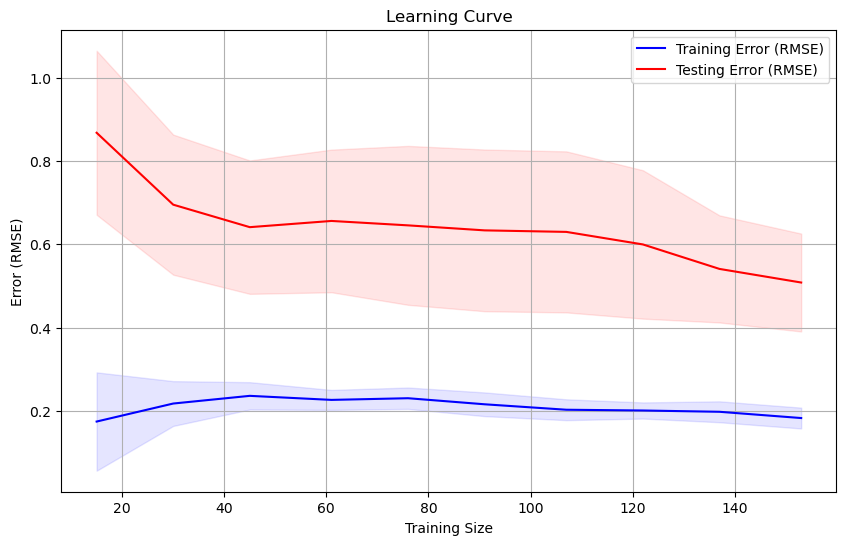

In [657]:
# Mendapatkan learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Menghitung rata-rata dan standar deviasi untuk train dan test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error (RMSE)', color='blue')
plt.plot(train_sizes, test_mean, label='Testing Error (RMSE)', color='red')

# Menambahkan area shaded untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

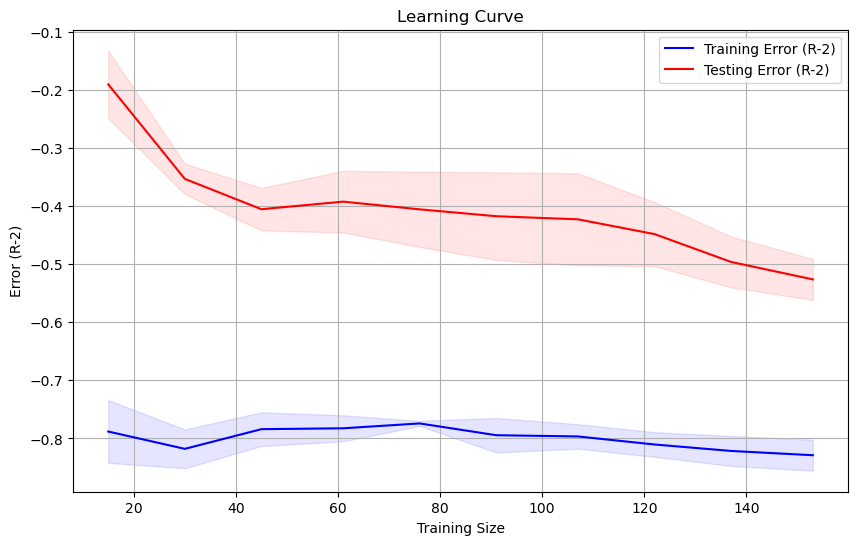

In [658]:
# Mendapatkan learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline_svr, X_train, y_train, cv=5, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Menghitung rata-rata dan standar deviasi untuk train dan test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error (R-2)', color='blue')
plt.plot(train_sizes, test_mean, label='Testing Error (R-2)', color='red')

# Menambahkan area shaded untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Error (R-2)')
plt.legend()
plt.grid(True)
plt.show()

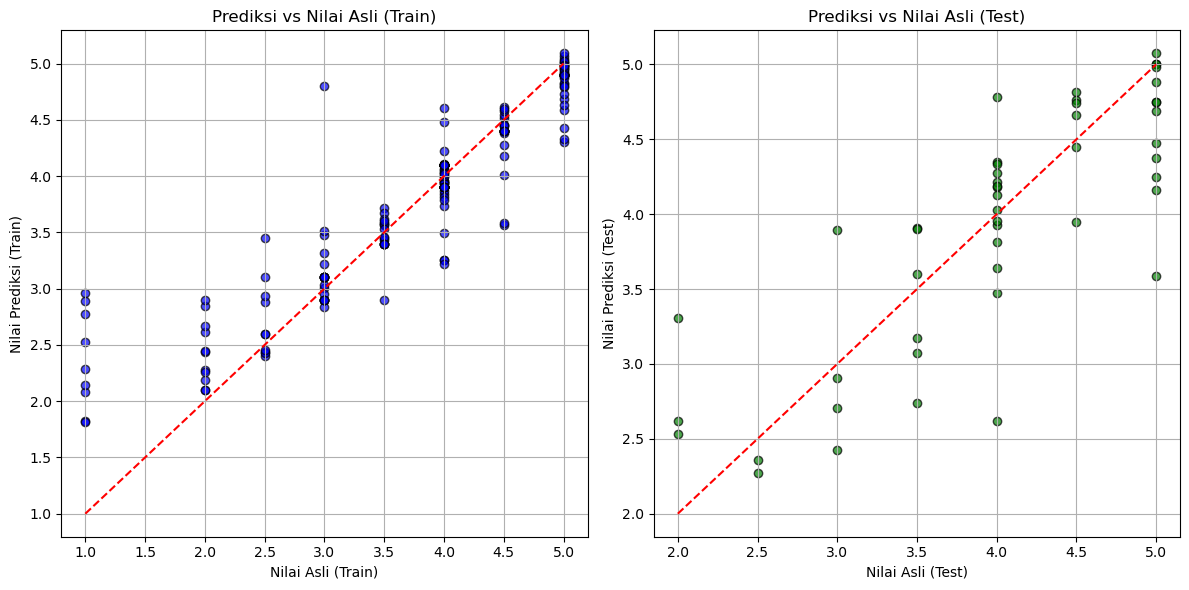

In [659]:
# Prediksi
y_train_pred = best_pipeline_svr.predict(X_train)
y_test_pred = best_pipeline_svr.predict(X_test)
plt.figure(figsize=(12, 6))

# Plot data latih
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7, edgecolor='k')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Garis identitas
plt.xlabel('Nilai Asli (Train)')
plt.ylabel('Nilai Prediksi (Train)')
plt.title('Prediksi vs Nilai Asli (Train)')
plt.grid()

# Plot data uji
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis identitas
plt.xlabel('Nilai Asli (Test)')
plt.ylabel('Nilai Prediksi (Test)')
plt.title('Prediksi vs Nilai Asli (Test)')
plt.grid()

plt.tight_layout()
plt.show()

### 4.3 Feature Importance

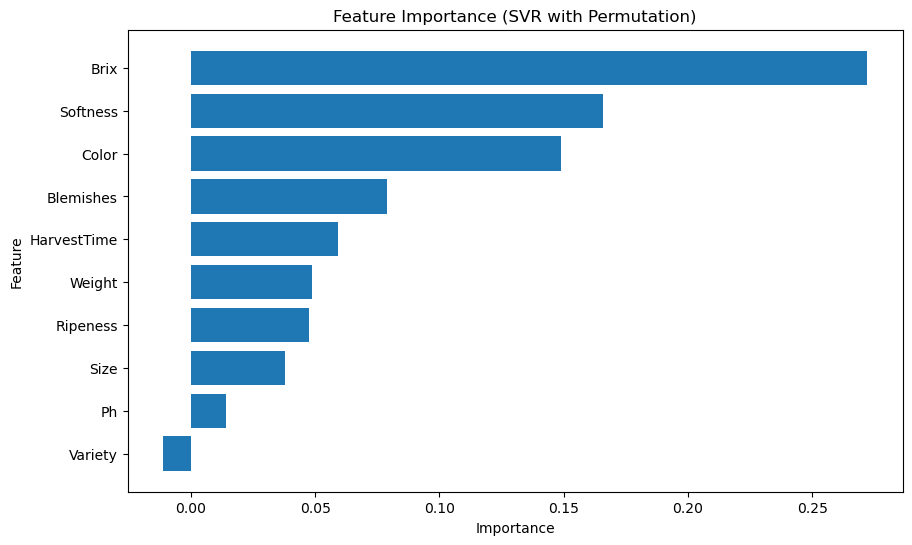

In [660]:
best_pipeline_svr.fit(X_train, y_train)  # Melatih model dengan data latih

# Hitung Permutation Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_pipeline_svr, X_test, y_test, scoring="r2", random_state=42)

# Mengurutkan feature importance
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (SVR with Permutation)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Simpan model
model_save_path = "../model/model_svr_jeruk.pkl"
joblib.dump(best_pipeline_svr, model_save_path)

print(f"Model terbaik disimpan di {model_save_path}")

# 6.Kesimpulan

Setelah melakukan eksplorasi, preprocessing data, dan evaluasi berbagai model regresi, Support Vector Regression (SVR) dengan parameter terbaik (C=10, epsilon=0.1) memberikan performa terbaik dengan metrik evaluasi sebagai berikut:

* RMSE: 0.4786
* MAE: 0.3687
* Median AE: 0.3063
* R² Score: 0.6925
  
Model ini memiliki akurasi prediksi yang cukup tinggi dan dapat diandalkan untuk menilai kualitas jeruk berdasarkan fitur yang tersedia.

### Keunggulan Model
Model yang digunakan dalam penelitian ini, Support Vector Regression (SVR), menunjukkan kinerja yang sangat baik dalam memprediksi kualitas jeruk berdasarkan sejumlah fitur yang tersedia, seperti ukuran, berat, tingkat kemanisan, dan waktu panen. Beberapa keunggulan utama SVR yang mendasari pemilihan model ini adalah:

* Kemampuan Menangani Non-linearitas: SVR dapat menangani hubungan non-linear yang sering terjadi dalam data kualitas produk pertanian. Hal ini sangat bermanfaat ketika hubungan antara fitur (seperti ukuran jeruk) dan kualitasnya tidak bersifat linier.

* Generalization yang Baik: SVR bekerja sangat baik dengan data yang tidak memiliki terlalu banyak noise dan mampu melakukan generalisasi dengan baik, yang sangat penting dalam kasus prediksi kualitas jeruk yang dapat bervariasi.

* Fleksibilitas: Dengan penyesuaian parameter C dan epsilon, model ini bisa disesuaikan untuk meminimalkan kesalahan dan mendapatkan prediksi yang lebih akurat, seperti yang terlihat pada peningkatan R² dan penurunan RMSE.


### Manfaat untuk Produsen Jeruk
Adopsi model prediktif berbasis machine learning seperti SVR dapat memberikan manfaat signifikan bagi produsen jeruk, antara lain:

* Peningkatan Efisiensi: Model ini memungkinkan evaluasi kualitas jeruk secara otomatis dan lebih cepat. Alih-alih mengandalkan penilaian manual yang memakan waktu dan rentan kesalahan, produsen dapat memanfaatkan teknologi untuk meningkatkan efisiensi.

* Pengurangan Biaya Produksi: Dengan memprediksi kualitas jeruk secara akurat, produsen dapat mengurangi pemborosan dan meningkatkan keputusan dalam pemilihan buah yang akan diproses lebih lanjut atau dikirim ke pasar. Ini juga mengurangi kemungkinan produk yang rusak atau kualitas rendah mencapai konsumen.

* Konsistensi Kualitas Produk: Konsistensi dalam kualitas jeruk sangat penting untuk mempertahankan kepuasan konsumen. Model ini memberikan penilaian yang lebih objektif dan konsisten, memastikan bahwa produk yang dikirim ke pasar memenuhi standar kualitas yang diinginkan.

Peningkatan Kepuasan Pelanggan: Produk yang memenuhi ekspektasi kualitas secara konsisten akan meningkatkan kepuasan pelanggan dan membangun reputasi merek yang baik di pasar. Produsen jeruk dapat memperbaiki daya saing mereka dengan memastikan produk yang lebih berkualitas.


### Harapan ke Depan
Ke depan, harapan dari penerapan model ini adalah untuk terus meningkatkan akurasi dan efisiensi dengan beberapa cara:

* Peningkatan Dataset: Memperluas dataset yang digunakan untuk pelatihan model dapat membantu model belajar dari lebih banyak variabilitas dan kondisi yang ada di lapangan, memperbaiki akurasi prediksi.

* Integrasi dengan Internet of Things (IoT): Mengintegrasikan model ini dengan perangkat IoT yang memantau kualitas jeruk secara langsung (seperti sensor kelembaban dan suhu) dapat memberikan data real-time yang lebih presisi. Ini akan memfasilitasi sistem prediksi kualitas yang lebih dinamis dan responsif.

* Penerapan di Skala Industri: Model ini, yang terbukti efektif di level eksperimen, diharapkan bisa diterapkan dalam skala industri yang lebih besar. Dengan automasi proses kontrol kualitas yang lebih luas, produsen jeruk bisa mencapai standar yang lebih tinggi dan lebih seragam di seluruh rantai pasokan.

* Penyempurnaan Model: Teknik pembelajaran mesin lainnya seperti Deep Learning dan Random Forest bisa ditambahkan untuk meningkatkan model lebih lanjut, atau penggabungan beberapa model dapat dilakukan untuk mendapatkan hasil yang lebih akurat.